### Imporing libraries

In [6]:
import cv2
import matplotlib.pyplot as plt

### reading img

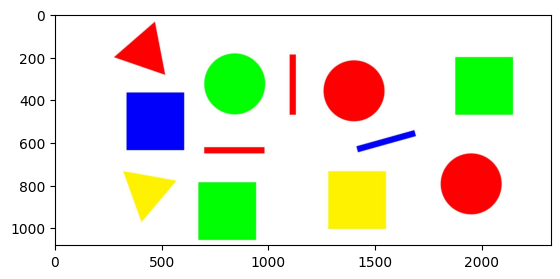

In [8]:
img = cv2.imread("test.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### detecting edges

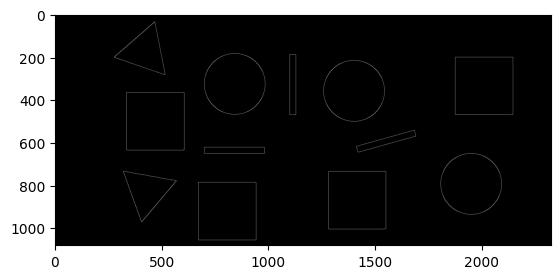

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)
plt.imshow(edges, cmap="gray")

### sth

In [ ]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
# returns a list of arrays of (x,y) coordanites of points along the edges of each contour

for shape in contours: #loops on all shapes one by one
    perimeter = cv2.arcLength(shape, True)
    corners = cv2.approxPolyDP(shape, 0.02 * perimeter , True) #return list of coordanetes of corners
    n_corners = len(corners)
    x, y, width, height = cv2.boundingRect(corners)

    if n_corners == 3:
        answer = "Triangle"
    elif n_corners == 4:
        if width/height < 1.1 and width/height > 0.9:
            answer = "Square"
        else : 
            answer = "Rectangle"
    else :
        answer = "circle"






Square
Square
Triangle
circle
Rectangle
Rectangle
Square
circle
Square
Rectangle
circle
Triangle
